# Práctica 2-1: Implementación de modelos 

Omar Jiménez Armendáriz A01732097

## 1. Investigación documental: algoritmo de Máquinas de Soporte Vectorial

Las Máquinas de Soporte Vectorial conforman uno de los algoritmos clásicos del Aprendizaje Automático Supervisado y encuentra su utilidad principalmente en problemas de clasificación binaria. El algoritmo fue ideado por Vladimir N. Vapnik y sus colegas, propuesto en 1995 en el artículo de investigación “Suport Vector Method for Function Approximation”.  

Este algoritmo funciona por medio de la definición de un hiperplano en un espacio de 2 o n dimensiones donde se encuentran ubicados los puntos que representan los datos a analizar. De esta forma, el hiperplano separa en dos grupos los datos y su clasificación es asignada según el lado en el que se encuentren. Debido a que su implementación emplea técnicas de geometría computacional, ve aplicaciones principalmente y de forma más directa con datos cuantitativos.
Para definir el hiperplano óptimo, es necesario determinar los dos puntos de categorías diferentes que se encuentren más cerca entre sí, llamados vectores de soporte, para posteriormente trazar una línea que conecte ambos y, finalmente, trazar el hiperplano como una frontera perpendicular a esa línea que divida en dos el grupo de datos. De esta forma, se delimita un margen óptimo, el cual abarca la distancia entre el hiperplano y los vectores de soporte.

En este algoritmo, el modelo resultante es la ecuación lineal que define el hiperplano como una línea recta. Esta ecuación permite identificar la clasificación de los datos de acuerdo con el signo del resultado, siendo que si el resultado es igual a cero entonces el dato se encuentra justo encima del plano y por ende su clasificación puede ser aleatoria, mientras que si es menor a cero pertenece a una categoría y es mayor a la otra. 

Sin embargo, en ocasiones la presencia de outliers (datos que escapan de la norma) puede generar sobreajuste debido a que generan un margen muy reducido. Para solucionar este problema, se implementa el hiperparámetro C, el cual permite definir un “soft margin” (en contraposición con el “hard margin” predeterminado) y que, por norma general, mientras mayor sea, menor será el margen y viceversa. Este parámetro es seleccionado de manera experimental comparando diferentes valores de C con el error que generan.

 Otro caso que considerar es cuando la distribución general de los datos no es linealmente separable.  Para estos casos, es necesario implementar funciones de kernel o también conocidas como “Truco de kernel”. Este método implica transformar los datos de forma que cuenten con dimensiones adicionales, lo cual permite que en este nuevo espacio exista una forma de trazar una frontera lineal que los separe exitosamente. Posteriormente, los datos regresan a sus dimensiones originales, pero ahora con una frontera que los delimite. Para llevar a cabo este proceso, se requiere emplear álgebra lineal, en la forma de funciones polinomiales y funciones gaussianas.  


### Referencias:

Las Máquinas de Soporte Vectorial: una explicación completa | Codificando Bits. (s. f.). Codificando Bits. https://www.codificandobits.com/blog/maquinas-de-soporte-vectorial/#aplicaciones

What is Support Vector Machine? | IBM. (s. f.). https://www.ibm.com/topics/support-vector-machine


## 2. Implementación de algoritmos

### Lectura de datos

In [33]:
import pandas as pd
from pandas import Series,DataFrame

setInicial=pd.read_csv('Vinos.csv')

#Recuperar nombres de las columnas de los atributos y la clase
atributosName=setInicial.columns[:-1]
atributoClase=setInicial.columns[-1]
print(atributoClase)
print(atributosName)

#Datos de los atributos
dataGral=setInicial[atributosName]

#Datos de la clase (vector de elementos reales)
claseGral=setInicial[atributoClase]

#Instancias por clase
print(claseGral.value_counts())


Clase
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Clase
Calidad_5    681
Calidad_7    199
Name: count, dtype: int64


### Separación del conjunto de datos

In [34]:
from sklearn.model_selection import train_test_split

#Separar los datos
valoresTrain, valoresTest, clasesTrain, clasesTest= \
train_test_split(dataGral, claseGral, test_size=0.30)

print(len(valoresTrain), len(valoresTest))

valoresTrain.head()


616 264


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
95,8.1,0.67,0.55,1.8,0.117,32.0,141.0,0.99680,3.17,0.62,9.4
51,6.7,0.75,0.12,2.0,0.086,12.0,80.0,0.99580,3.38,0.52,10.1
212,7.7,0.96,0.20,2.0,0.047,15.0,60.0,0.99550,3.36,0.44,10.9
695,10.0,0.31,0.47,2.6,0.085,14.0,33.0,0.99965,3.36,0.80,10.5
602,10.0,0.32,0.59,2.2,0.077,3.0,15.0,0.99940,3.20,0.78,9.6


### KNN

#### Funciones de distancia


In [30]:
import math

#Distancia euclideana
def euclidiana(vector_i, vector_j):
  sum_subtotal = 0
  for x_i, x_j in zip(vector_i, vector_j):
      intermediate = math.pow((x_i  - x_j), 2)
      sum_subtotal += intermediate

  result = math.sqrt(sum_subtotal)

  return result

#Distancia Manhattan
def manhattan(vector_i, vector_j):
  total = 0
  for x_i, x_j in zip(vector_i, vector_j):
    total += math.fabs(x_i - x_j)

  return total

#Coseno
def coseno(vector_i, vector_j):
  denominador_i = 0
  denominador_j = 0
  numerador = 0
  for x_i, x_j in zip(vector_i, vector_j):
    numerador += x_i * x_j
    denominador_i += math.pow(x_i, 2)
    denominador_j += math.pow(x_j, 2)

  return (numerador/(math.sqrt(denominador_i)*math.sqrt(denominador_j)))




#### Implementación de algoritmo


In [31]:
import random

def KNN(datosEntrenamiento, datoPredecir, metricaDistancia, cantidadVecinos):
  for i in range(len(datoPredecir)):
    if metricaDistancia == 'euclidiana':
      datosEntrenamiento['Distance'] = datosEntrenamiento.apply(lambda row: euclidiana(row[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], datoPredecir.iloc[i]), axis=1)
    elif metricaDistancia == 'manhattan':
      datosEntrenamiento['Distance'] = datosEntrenamiento.apply(lambda row: manhattan(row[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], datoPredecir.iloc[i]), axis=1)
    Datos_sorted = datosEntrenamiento.sort_values(by='Distance')

    # Drop the 'Distance' column if needed
    Datos_sorted.drop('Distance', axis=1, inplace=True)

    Vecinos = Datos_sorted.head(cantidadVecinos)

    Cuenta = Vecinos['Clase'].value_counts().get('Calidad_5', 0)    
    
    if Cuenta > cantidadVecinos/2: 
      datoPredecir.loc[i, 'Clase'] = 'Calidad_5'
    elif Cuenta < cantidadVecinos/2:
      datoPredecir.loc[i, 'Clase'] = 'Calidad_7'
    else:
      datoPredecir.loc[i, 'Clase'] = random.choice(['Calidad_5', 'Calidad_7'])
      
  return datoPredecir['Clase']

#### Evaluación

In [9]:
from sklearn.metrics import accuracy_score

combined_train_df = pd.concat([valoresTrain, clasesTrain], axis=1)

combined_train_df.reset_index(drop=True, inplace=True)


valoresTest.reset_index(drop=True, inplace=True)

predict=KNN(combined_train_df, valoresTest, 'euclidiana', 5)

valoresTrain.reset_index(drop=True, inplace=True)

predictTrain=KNN(combined_train_df, valoresTrain, 'euclidiana', 5)


clasesTest.reset_index(drop=True, inplace=True)
print("Conjunto de evaluación: ",accuracy_score(clasesTest,predict))

clasesTrain.reset_index(drop=True, inplace=True)
print("Conjunto de entrenamiento: ",accuracy_score(clasesTrain,predictTrain))


Conjunto de evaluación:  0.803030303030303
Conjunto de entrenamiento:  0.8896103896103896


### Árbol de decisión

|--- alcohol <= 10.53
|   |--- alcohol <= 9.85
|   |   |--- fixed acidity <= 12.45
|   |   |   |--- class: Calidad_5
|   |   |--- fixed acidity >  12.45
|   |   |   |--- class: Calidad_7
|   |--- alcohol >  9.85
|   |   |--- sulphates <= 0.63
|   |   |   |--- class: Calidad_5
|   |   |--- sulphates >  0.63
|   |   |   |--- class: Calidad_5
|--- alcohol >  10.53
|   |--- sulphates <= 0.63
|   |   |--- volatile acidity <= 0.49
|   |   |   |--- class: Calidad_7
|   |   |--- volatile acidity >  0.49
|   |   |   |--- class: Calidad_5
|   |--- sulphates >  0.63
|   |   |--- alcohol <= 11.55
|   |   |   |--- class: Calidad_7
|   |   |--- alcohol >  11.55
|   |   |   |--- class: Calidad_7



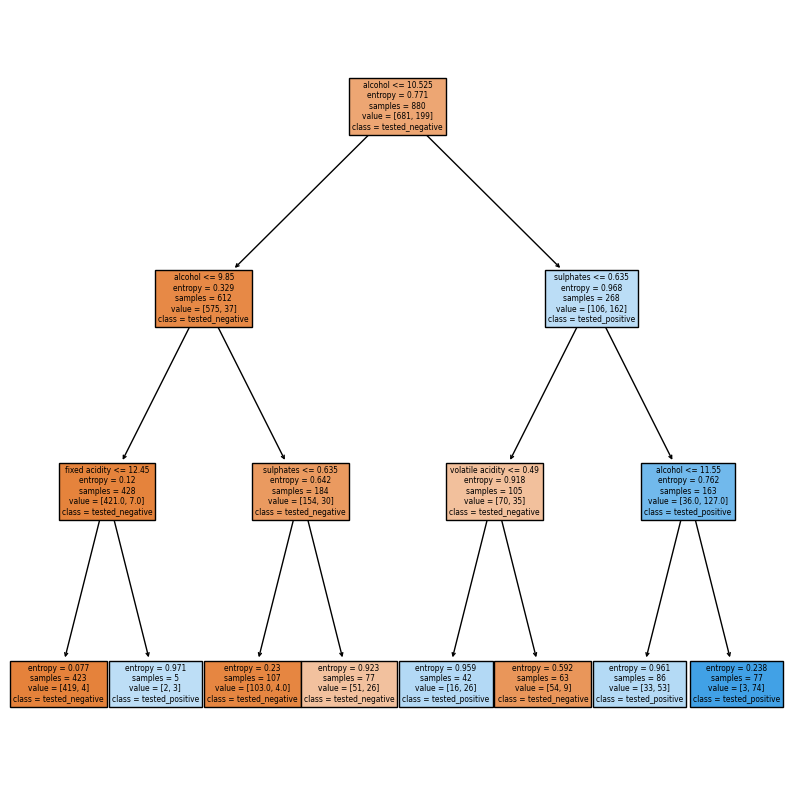

In [10]:
from sklearn.tree import DecisionTreeClassifier

################## Clasificador ######################
clasificador = DecisionTreeClassifier(criterion='entropy', max_depth=3)

################## Modelo ###########################
modelo = clasificador.fit(dataGral, claseGral)

from sklearn.tree import export_text

arbol = export_text(modelo, feature_names=atributosName.to_list())
print(arbol)



import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clasificador,feature_names=atributosName.to_list(),class_names=['tested_negative','tested_positive'],filled=True)#, rounded=True)
plt.show()

#### Evaluación

In [22]:
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

################## Clasificador ######################
clasificador = DecisionTreeClassifier(criterion='entropy')

################## Modelo ###########################
if len(valoresTrain) > 11:
    valoresTrain = valoresTrain[valoresTrain.columns[:-1]]
modelo = clasificador.fit(valoresTrain, clasesTrain)

if len(valoresTest) > 11:
    valoresTest = valoresTest[valoresTest.columns[:-1]]


predict = modelo.predict(valoresTest)
predictTrain=modelo.predict(valoresTrain)

print("Conjunto de evaluación: ",accuracy_score(clasesTest,predict))
print("Conjunto de entrenamiento: ",accuracy_score(clasesTrain,predictTrain))


Conjunto de evaluación:  0.8409090909090909
Conjunto de entrenamiento:  1.0


### Máquinas de soporte vectorial

In [23]:
from sklearn import svm

################## Clasificador ######################
clasificador = svm.SVC(C=1)

################## Modelo ###########################
modelo = clasificador.fit(dataGral, claseGral)

#### Evaluación

In [24]:
from sklearn.metrics import accuracy_score

from sklearn import svm

################## Clasificador ######################
clasificador = svm.SVC(C=1)

################## Modelo ###########################
modelo = clasificador.fit(valoresTrain, clasesTrain)

predict = modelo.predict(valoresTest)
predictTrain=modelo.predict(valoresTrain)

print("Conjunto de evaluación: ",accuracy_score(clasesTest,predict))
print("Conjunto de entrenamiento: ",accuracy_score(clasesTrain,predictTrain))


Conjunto de evaluación:  0.7916666666666666
Conjunto de entrenamiento:  0.7694805194805194


## 3. Experimentación

### KNN

[0.8106060606060606, 0.8106060606060606, 0.7954545454545454, 0.8143939393939394, 0.7954545454545454]
[0.8928571428571429, 0.8831168831168831, 0.8733766233766234, 0.862012987012987, 0.8571428571428571]


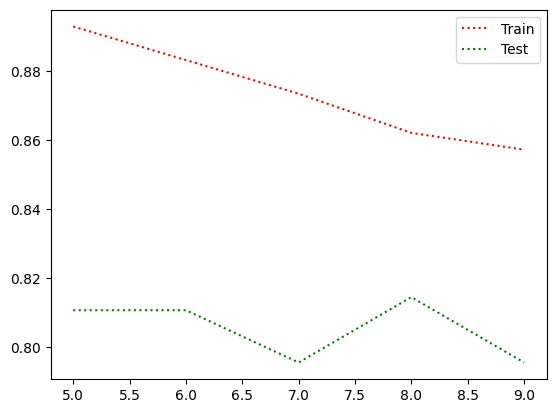

In [35]:
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

prof=[5,6,7,8,9]

Train=[]
Test=[]

################## Clasificador ######################

combined_train_df = pd.concat([valoresTrain, clasesTrain], axis=1)

combined_train_df.reset_index(drop=True, inplace=True)



################## Modelo ###########################
for x in prof:   
    
    valoresTest.reset_index(drop=True, inplace=True)
    valoresTrain.reset_index(drop=True, inplace=True)
    
    
    predict=KNN(combined_train_df, valoresTest, 'euclidiana', x)
    predictTrain=KNN(combined_train_df, valoresTrain, 'euclidiana', x)
    
    clasesTest.reset_index(drop=True, inplace=True)
    clasesTrain.reset_index(drop=True, inplace=True)
    
    Test.append(accuracy_score(clasesTest,predict))
    Train.append(accuracy_score(clasesTrain,predictTrain))

print(Test)
print(Train)

plt.plot(prof, Train, label='Train', color='red', linestyle='dotted')
plt.plot(prof,Test, label='Test', color='green', linestyle='dotted')
plt.legend()


### Árbol de decisión

[0.8409090909090909, 0.8522727272727273, 0.8409090909090909, 0.8598484848484849, 0.8446969696969697]
[0.9074675324675324, 0.974025974025974, 1.0, 1.0, 1.0]


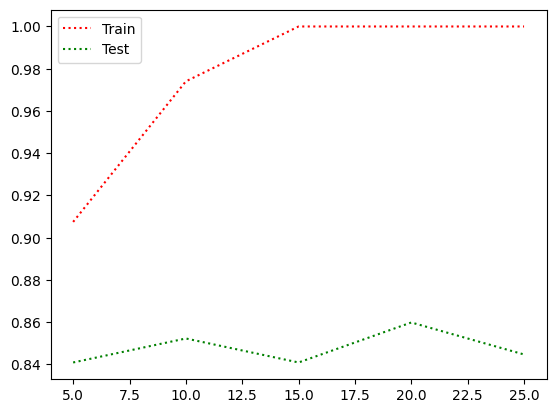

In [25]:
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

prof=[5,10,15,20,25]

Train=[]
Test=[]

################## Clasificador ######################

################## Modelo ###########################
for x in prof:
    clasificador = DecisionTreeClassifier(criterion='entropy', max_depth=x)    
    modelo = clasificador.fit(valoresTrain, clasesTrain)
    predict = modelo.predict(valoresTest)
    predictTrain=modelo.predict(valoresTrain)
    
    Test.append(accuracy_score(clasesTest,predict))
    Train.append(accuracy_score(clasesTrain,predictTrain))

print(Test)
print(Train)

plt.plot(prof, Train, label='Train', color='red', linestyle='dotted')
plt.plot(prof,Test, label='Test', color='green', linestyle='dotted')
plt.legend()


### Máquinas de soporte vectorial

[0.7916666666666666, 0.7916666666666666, 0.7878787878787878, 0.7878787878787878, 0.7878787878787878]
[0.7694805194805194, 0.7694805194805194, 0.7694805194805194, 0.7694805194805194, 0.7694805194805194]


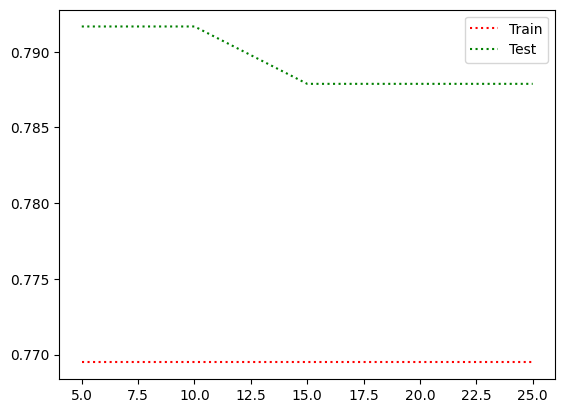

In [26]:
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

prof=[5,10,15,20,25]

Train=[]
Test=[]

################## Clasificador ######################

################## Modelo ###########################
for x in prof:
    clasificador = svm.SVC(C=x)    
    modelo = clasificador.fit(valoresTrain, clasesTrain)
    predict = modelo.predict(valoresTest)
    predictTrain=modelo.predict(valoresTrain)
    
    Test.append(accuracy_score(clasesTest,predict))
    Train.append(accuracy_score(clasesTrain,predictTrain))

print(Test)
print(Train)

plt.plot(prof, Train, label='Train', color='red', linestyle='dotted')
plt.plot(prof,Test, label='Test', color='green', linestyle='dotted')
plt.legend()


## 4. Conclusiones

### - ¿Qué algoritmo tuvo un mejor desempeño? ¿Con qué parámetros se logró esto?

El algoritmo con mejor desempeño fue el algoritmo de Árbol de decisión empleando un parámetro de profundidad de 20, ya que obtiene una precisión del 86% que es superior a la obtenida con cualquiera de los otros algoritmos, además de que en comparación, fue el único algoritmo que logró el 100% de precisión respecto al conjunto de entrenamiento original.

### - ¿Hay diferencia significativa entre los diferentes algoritmos?

Sí, ya que, por ejemplo, el algoritmo KNN resultó ser más intensivo en recursos que los demás y los resultados ofrecidos no fueron significativas mejores. Por otro lado, algoritmos como el de árbol de decisión tienen una facilidad mayor para ser representados gráficamente ya que permite generar un árbol visualizable, mientras que los otros dos, al representar espacios de más de 3 dimensiones, no. Finalmente, la diferencia más importante está en los resultados de cada uno, ya que el árbol de decisión fue remarcablemente superior bajo la métrica de precisión.

### - ¿Los resultados obtenidos permiten usar estos algoritmos en un consultorio médico? ¿Por qué?

Sí, ya que en un consultorio médico suele realizarse un diagnóstico médico general y no requiere de atención especializada ni de atención médica de riesgo. Por lo tanto, una precisión de 86% puede ser lo suficientemente satisfactoria en la gran mayoría de los casos e incluso en los que no, la probabilidad es baja y el riesgo también. 

In [40]:
%%bash
jupyter nbconvert --to html Act2_1.ipynb

[NbConvertApp] Converting notebook Act2_1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 549898 bytes to Act2_1.html
